The purpose of this file is to import the crash analysis data from 
https://catalogue.data.govt.nz/dataset/crash-analysis-system-cas-data3/resource/0dfd1ddb-582a-4a21-9cab-298c0b592729
which is a dataset filled in by police officers about crashes in New Zealand, and filter it by crashes in christchurch for further use in creating a data model displaying data about the crashes in christchurch

In [3]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
# import the csv data from the file into R 
crash_data <- read_csv(file = "crash_data.csv") 

Rows: 801911 Columns: 72
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (20): crashDirectionDescription, crashFinancialYear, crashLocation1, cra...
dbl (50): X, Y, OBJECTID, advisorySpeed, areaUnitID, bicycle, bridge, bus, c...
lgl  (2): crashRoadSideRoad, intersection

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
crash_data

X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,⋯,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1808645,5819854,1,NA,527125,0,0,0,2,0,⋯,0,0,0,0,Open,0,0,0,Light rain,Null
1569263,5177269,2,NA,595000,0,NA,0,2,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1392831,4908393,3,NA,602000,0,0,0,1,0,⋯,0,0,0,0,Urban,0,0,0,Heavy rain,Null
1394050,4916036,4,NA,606210,0,NA,0,2,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1408373,4913799,5,NA,604611,0,NA,0,2,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1554448,5181256,6,NA,587821,0,0,0,1,0,⋯,0,0,0,0,Open,0,0,1,Light rain,Null
1549322,5285349,7,NA,585506,0,NA,0,1,NA,⋯,NA,NA,0,0,Open,0,NA,NA,Heavy rain,Null
1572260,5180996,8,NA,593300,0,NA,0,2,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1400979,4912633,9,NA,602422,0,0,0,1,1,⋯,0,0,0,0,Open,0,0,0,Fine,Null


In [6]:
# display the column names a
crash_data %>% colnames()


[1] "X"                         "Y"                        
 [3] "OBJECTID"                  "advisorySpeed"            
 [5] "areaUnitID"                "bicycle"                  
 [7] "bridge"                    "bus"                      
 [9] "carStationWagon"           "cliffBank"                
[11] "crashDirectionDescription" "crashFinancialYear"       
[13] "crashLocation1"            "crashLocation2"           
[15] "crashRoadSideRoad"         "crashSeverity"            
[17] "crashSHDescription"        "crashYear"                
[19] "debris"                    "directionRoleDescription" 
[21] "ditch"                     "fatalCount"               
[23] "fence"                     "flatHill"                 
[25] "guardRail"                 "holiday"                  
[27] "houseOrBuilding"           "intersection"             
[29] "kerb"                      "light"                    
[31] "meshblockId"               "minorInjuryCount"         
[33] "moped"                     "motorcycle"               
[35] "NumberOfLanes"             "objectThrownOrDropped"    
[37] "otherObject"               "otherVehicleType"         
[39] "overBank"                  "parkedVehicle"            
[41] "pedestrian"                "phoneBoxEtc"              
[43] "postOrPole"                "region"                   
[45] "roadCharacter"             "roadLane"                 
[47] "roadSurface"               "roadworks"                
[49] "schoolBus"                 "seriousInjuryCount"       
[51] "slipOrFlood"               "speedLimit"               
[53] "strayAnimal"               "streetLight"              
[55] "suv"                       "taxi"                     
[57] "temporarySpeedLimit"       "tlaId"                    
[59] "tlaName"                   "trafficControl"           
[61] "trafficIsland"             "trafficSign"              
[63] "train"                     "tree"                     
[65] "truck"                     "unknownVehicleType"       
[67] "urban"                     "vanOrUtility"             
[69] "vehicle"                   "waterRiver"               
[71] "weatherA"                  "weatherB"

In [7]:
# now filter the crash data so it only shows crashes in christchurch 
chch_crashes = crash_data %>% filter(region == "Canterbury Region")
chch_crashes %>% sample_n(5)

X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,⋯,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1566822,5186722,968644,NA,588402,0,NA,0,2,NA,⋯,NA,NA,0,0,Open,1,NA,NA,Fine,Null
1571645,5181638,207579,NA,592600,0,0,0,2,0,⋯,0,0,0,0,Urban,0,0,0,Fine,Null
1565650,5178486,1094836,NA,587702,0,NA,0,4,NA,⋯,NA,NA,0,0,Open,0,NA,NA,Fine,Null
1622257,5261574,159094,NA,585601,0,NA,0,0,NA,⋯,NA,NA,0,0,Open,0,NA,NA,Light rain,Null
1566603,5179790,927289,NA,590200,0,NA,0,1,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null


now we want to download the chch crash data to create our data model 

In [ ]:
write.

First we want to see if the weather has an effect on the crash probability 

In [8]:
# isolate the weather column
crash_weather = chch_crashes %>% select(weatherA)

In [9]:
# create a table from the weather column - this makes it easy to produce a bar plot 
weather_table = table(crash_weather)

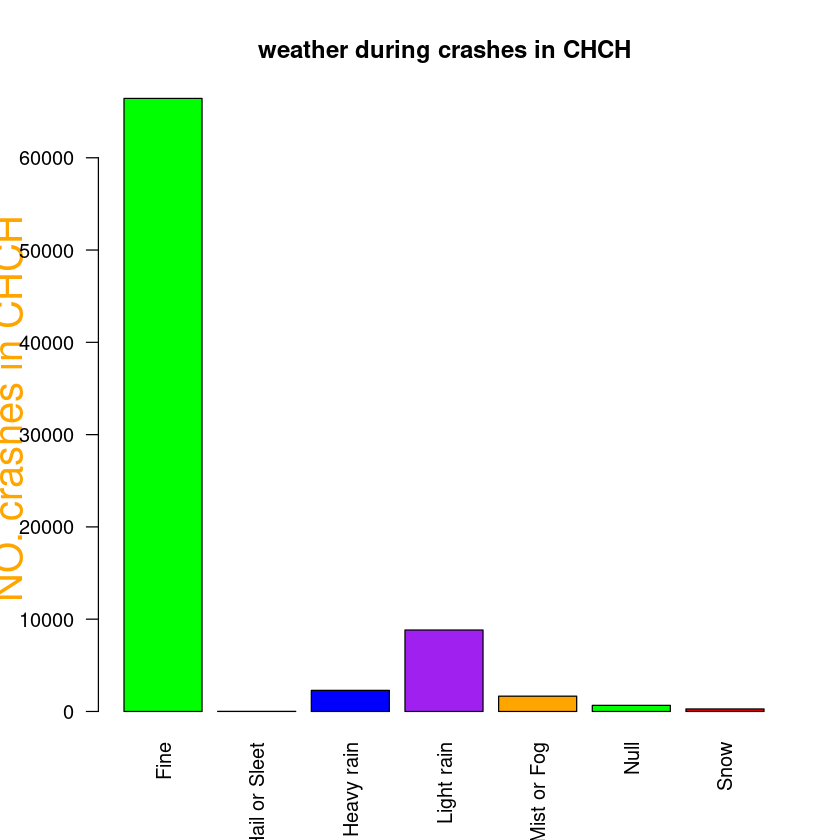

In [13]:
# create a barplot of the table 
barplot(weather_table,
        col = c('green', 'red', 'blue', 'purple', 'orange'),
        ylab="NO. crashes in CHCH",
        col.lab="orange",
        cex.lab=2,
        las=2,
        main="weather during crashes in CHCH")